In [165]:
!pip install fredapi > /dev/null

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [167]:
fred_key = 'a1c45bc7e63e5af78440819ebbac6df5'

# 1. Create The Fred Object to Fetch the Data

In [168]:
fred = Fred(api_key = fred_key)

In [169]:
fred

# 2. Search for economic data

In [170]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [171]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-01,2024-01-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-12-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-29 09:58:05-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-01,2024-01-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-01-01,2024-01-01,S&P 500,2013-12-30,2023-12-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-12-29 19:11:01-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-01-01,2024-01-01,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-01,2024-01-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-12-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-12-29 09:58:08-06:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data & plot

In [172]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

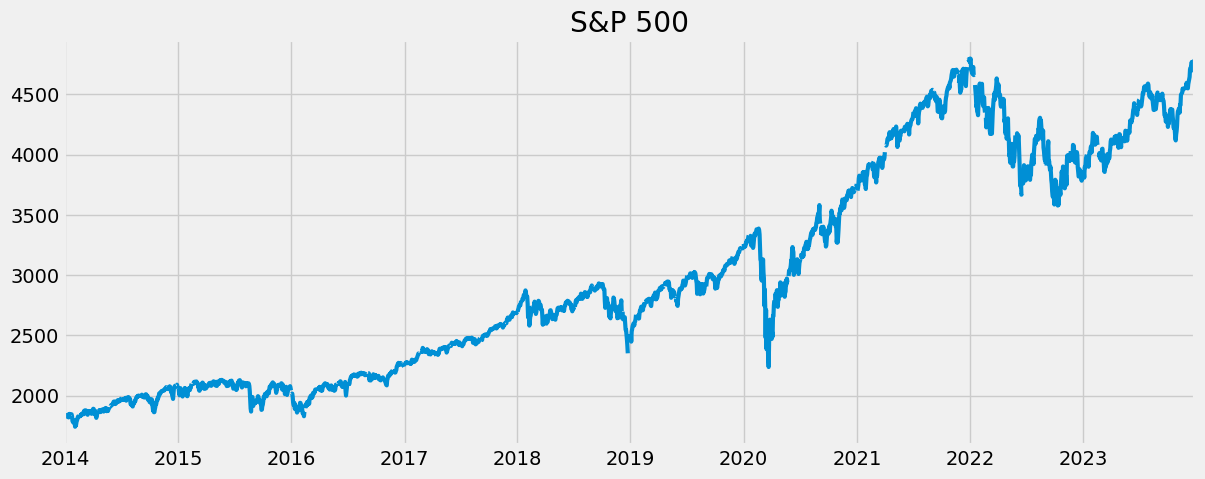

In [173]:
sp500.plot(figsize = (13, 5), title = 'S&P 500', lw = 3)

# 4. Pull and Join Multiple Data Series

In [174]:
unemp_df = fred.search('unemployment rate state')

In [ ]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))

In [ ]:
unemp_df.shape

In [177]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [178]:
unemp_df.shape

(162, 15)

In [179]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [180]:
unemp_df.shape

(100, 15)

In [181]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-01-01,2024-01-01,Unemployment Rate,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:02-06:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-01-01,2024-01-01,Unemployment Rate - Black or African American,1972-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:05-06:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2024-01-01,2024-01-01,Unemployment Rate in California,1976-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-28 15:24:01-06:00,61,None
LNS14000024,LNS14000024,2024-01-01,2024-01-01,Unemployment Rate - 20 Yrs. & over,1948-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:14-06:00,52,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-01-01,2024-01-01,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,47,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000315,LNS14000315,2024-01-01,2024-01-01,Unemployment Rate - Married Women,1955-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:45-06:00,2,To obtain estimates of women worker employment...
LNS14000029,LNS14000029,2024-01-01,2024-01-01,"Unemployment Rate - 20 Yrs. & over, White Women",1954-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:50:59-06:00,2,To obtain estimates of women worker employment...
LNS14024232,LNS14024232,2024-01-01,2024-01-01,"Unemployment Rate - 55 Yrs. & over, Women",1994-01-01,2023-11-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-12-08 07:51:41-06:00,2,None


In [182]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
    
unemp_results = pd.concat(all_results, axis = 1)

In [183]:
unemp_results

,UNRATE,LNS14000006,CAUR,LNS14000024,M0892AUSM156SNBR,U2RATE,M0892BUSM156SNBR,LNS14000031,TXUR,LNS14000002,FLUR,NYUR,LNS14000003,OHUR,LNS14024887,ILUR,NJUR,LNS14000009,LNS14000001,PAUR,LNS14027660,ALUR,LNS14027662,MIUR,KYUR,LRUN64TTUSM156S,LNS14000012,GAUR,COUR,AZUR,MAUR,TNUR,VAUR,MNUR,NCUR,LASMT261982000000003,LASMT391746000000003,LAUR,WAUR,ORUR,SCUR,WIUR,MDUR,LNS14027659,HIUR,IAUR,LNS14032183,MOUR,INUR,ARUR,PRUR,OKUR,WVUR,NVUR,NMUR,AKUR,MSUR,UTUR,MTUR,IDUR,CTUR,MEUR,NDUR,LNS14000060,NHUR,DCUR,LNS14000028,LNS14000036,RIUR,KSUR,LNS14000018,DEUR,NEUR,WYUR,CMWRUR,VTUR,SDUR,LNS14000026,LNS14000032,LNS14024230,LNS14000025,CSOUUR,LNS14027689,LNS14000048,CWSTUR,LNS14000089,LNS14200000,CNERUR,LRUNTTTTUSM156S,LNS14100000,CNEWUR,LRUN24TTUSM156S,LNS14000150,LNS14000015,LNS14000013,LNS14000315,LNS14000029,LNS14024232,LNS14000014,LNS14000319
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,3.5,5.8,4.6,3.2,NaN,1.6,NaN,5.3,4.1,3.4,2.7,3.9,3.1,3.3,8.0,4.0,3.9,4.4,3.6,3.5,3.4,2.1,2.0,3.6,3.9,3.637014,11.3,3.2,2.9,3.6,2.5,3.1,2.5,3.0,3.3,3.0,3.6,3.4,3.6,3.4,3.1,2.6,1.8,5.2,2.8,2.7,2.3,2.7,3.3,2.6,6.2,2.7,3.4,5.3,3.6,3.8,3.0,2.4,2.5,2.8,3.6,2.4,2.0,3.0,1.7,5.0,3.0,6.7,2.8,2.7,20.7,4.1,2.0,3.0,3.2,1.8,1.9,3.1,5.2,2.3,3.3,3.2,3.1,2.8,4.0,3.6,4.1,3.5,3.5,3.4,2.7,8.0,1.7,9.5,13.0,2.0,2.7,2.3,9.7,10.0
2023-08-01,3.8,5.3,4.6,3.5,NaN,1.7,NaN,5.0,4.1,3.5,2.7,3.9,3.4,3.4,8.6,4.1,4.2,4.9,4.0,3.5,3.8,2.1,2.2,3.7,4.0,3.803906,12.2,3.3,3.1,3.8,2.6,3.1,2.5,3.1,3.3,3.2,3.6,3.3,3.6,3.4,3.0,2.9,1.7,5.4,2.8,2.9,3.1,2.8,3.4,2.7,6.2,2.8,3.6,5.4,3.7,3.9,3.2,2.5,2.5,3.0,3.5,2.5,1.9,3.1,1

In [184]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [185]:
unemp_results

,CAUR,TXUR,FLUR,NYUR,OHUR,ILUR,NJUR,PAUR,ALUR,MIUR,KYUR,GAUR,COUR,AZUR,MAUR,TNUR,VAUR,MNUR,NCUR,LAUR,WAUR,ORUR,SCUR,WIUR,MDUR,HIUR,IAUR,MOUR,INUR,ARUR,PRUR,OKUR,WVUR,NVUR,NMUR,AKUR,MSUR,UTUR,MTUR,IDUR,CTUR,MEUR,NDUR,NHUR,DCUR,RIUR,KSUR,DEUR,NEUR,WYUR,VTUR,SDUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,2.7,3.9,3.3,4.0,3.9,3.5,2.1,3.6,3.9,3.2,2.9,3.6,2.5,3.1,2.5,3.0,3.3,3.4,3.6,3.4,3.1,2.6,1.8,2.8,2.7,2.7,3.3,2.6,6.2,2.7,3.4,5.3,3.6,3.8,3.0,2.4,2.5,2.8,3.6,2.4,2.0,1.7,5.0,2.8,2.7,4.1,2.0,3.0,1.8,1.9
2023-08-01,4.6,4.1,2.7,3.9,3.4,4.1,4.2,3.5,2.1,3.7,4.0,3.3,3.1,3.8,2.6,3.1,2.5,3.1,3.3,3.3,3.6,3.4,3.0,2.9,1.7,2.8,2.9,2.8,3.4,2.7,6.2,2.8,3.6,5.4,3.7,3.9,3.2,2.5,2.5,3.0,3.5,2.5,1.9,1.8,5.0,2.7,2.7,4.1,2.0,2.9,1.8,1.9
2023-09-01,4.7,4.1,2.8,4.0,3.4,4.4,4.4,3.4,2.2,3.9,4.1,3.4,3.2,4.0,2.6,3.2,2.5,3.1,3.4,3.3,3.6,3.5,2.9,3.1,1.6,2.8,3.0,2.9,3.6,2.9,6.0,3.0,3.8,5.4,3.7,4.1,3.2,2.6,2.7,3.1,3.5,2.7,1.9,2.0,5.0,2.6,2.8,4.1,2.1,2.9,1.9,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.6,4.6,3.4,2.3,4.1,4.2,3.4,3.3,4.2,2.8,3.3,2.7,3.2,3.4,3.3,3.8,3.6,2.9,3.2,1.7,2.9,3.2,3.1,3.6,3.1,5.8,3.2,4.0,5.4,3.8,4.3,3.3,2.7,2.8,3.2,3.5,2.8,1.9,2.1,5.0,2.7,2.9,4.2,2.2,2.9,2.0,2.0


In [186]:
unemp_states = unemp_results.copy()

In [187]:
unemp_states.isna().sum(axis = 1)

1929-04-01    52
1929-05-01    52
1929-06-01    52
1929-07-01    52
1929-08-01    52
              ..
2023-07-01     0
2023-08-01     0
2023-09-01     0
2023-10-01     0
2023-11-01     0
Length: 1124, dtype: int64

<Axes: >

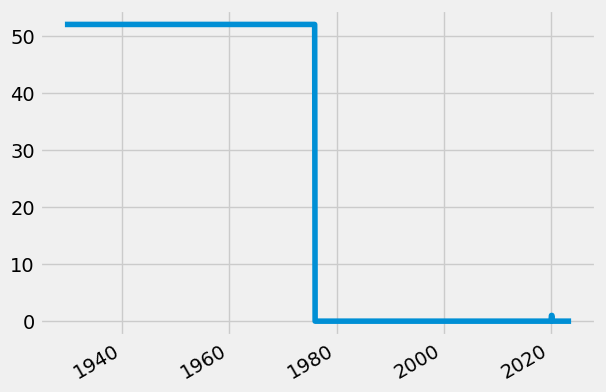

In [188]:
unemp_states.isna().sum(axis = 1).plot()

In [189]:
unemp_states = unemp_states.dropna()

In [190]:
unemp_states

,CAUR,TXUR,FLUR,NYUR,OHUR,ILUR,NJUR,PAUR,ALUR,MIUR,KYUR,GAUR,COUR,AZUR,MAUR,TNUR,VAUR,MNUR,NCUR,LAUR,WAUR,ORUR,SCUR,WIUR,MDUR,HIUR,IAUR,MOUR,INUR,ARUR,PRUR,OKUR,WVUR,NVUR,NMUR,AKUR,MSUR,UTUR,MTUR,IDUR,CTUR,MEUR,NDUR,NHUR,DCUR,RIUR,KSUR,DEUR,NEUR,WYUR,VTUR,SDUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.0,6.6,9.9,5.6,8.4,5.8,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.6,5.8,7.5,9.2,8.6,7.1,6.7,5.8,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.5,5.8,7.5,9.2,8.7,7.1,6.7,5.9,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.1,10.5,6.0,6.1,5.9,6.4,6.3,8.4,9.4,7.3,5.7,6.4,9.8,4.3,5.9,6.5,7.3,19.3,5.8,7.5,9.2,8.7,7.0,6.6,5.8,5.8,5.6,9.8,8.6,3.4,6.5,8.6,7.7,4.2,8.0,3.3,4.1,8.6,3.2
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.6,10.3,8.1,6.5,9.8,5.6,8.3,5.6,10.0,10.3,6.0,6.0,5.8,6.3,6.4,8.5,9.2,7.2,5.6,6.4,9.7,4.2,6.0,6.3,7.2,19.0,5.8,7.5,9.0,8.6,6.9,6.4,5.8,5.8,5.6,9.6,8.6,3.5,6.5,8.5,7.7,4.2,8.1,3.2,4.0,8.6,3.1
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.6,10.3,8.1,6.4,9.6,5.5,8.1,5.6,9.8,10.1,5.9,5.9,5.7,6.1,6.5,8.5,9.1,7.0,5.5,6.5,9.4,4.1,6.0,6.0,7.1,18.9,5.7,7.4,8.9,8.6,6.9,6.3,5.7,5.8,5.6,9.4,8.5,3.6,6.5,8.4,7.7,4.2,8.3,3.1,3.9,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,2.7,3.9,3.3,4.0,3.9,3.5,2.1,3.6,3.9,3.2,2.9,3.6,2.5,3.1,2.5,3.0,3.3,3.4,3.6,3.4,3.1,2.6,1.8,2.8,2.7,2.7,3.3,2.6,6.2,2.7,3.4,5.3,3.6,3.8,3.0,2.4,2.5,2.8,3.6,2.4,2.0,1.7,5.0,2.8,2.7,4.1,2.0,3.0,1.8,1.9
2023-08-01,4.6,4.1,2.7,3.9,3.4,4.1,4.2,3.5,2.1,3.7,4.0,3.3,3.1,3.8,2.6,3.1,2.5,3.1,3.3,3.3,3.6,3.4,3.0,2.9,1.7,2.8,2.9,2.8,3.4,2.7,6.2,2.8,3.6,5.4,3.7,3.9,3.2,2.5,2.5,3.0,3.5,2.5,1.9,1.8,5.0,2.7,2.7,4.1,2.0,2.9,1.8,1.9
2023-09-01,4.7,4.1,2.8,4.0,3.4,4.4,4.4,3.4,2.2,3.9,4.1,3.4,3.2,4.0,2.6,3.2,2.5,3.1,3.4,3.3,3.6,3.5,2.9,3.1,1.6,2.8,3.0,2.9,3.6,2.9,6.0,3.0,3.8,5.4,3.7,4.1,3.2,2.6,2.7,3.1,3.5,2.7,1.9,2.0,5.0,2.6,2.8,4.1,2.1,2.9,1.9,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.6,4.6,3.4,2.3,4.1,4.2,3.4,3.3,4.2,2.8,3.3,2.7,3.2,3.4,3.3,3.8,3.6,2.9,3.2,1.7,2.9,3.2,3.1,3.6,3.1,5.8,3.2,4.0,5.4,3.8,4.3,3.3,2.7,2.8,3.2,3.5,2.8,1.9,2.1,5.0,2.7,2.9,4.2,2.2,2.9,2.0,2.0


In [191]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').str.strip().to_dict()

# Print the keys in id_to_state
print("Keys in id_to_state:", id_to_state.keys())

# Print the actual column names in unemp_states
print("Columns of unemp_states:", unemp_states.columns)

# Try to update columns
unemp_states.columns = [id_to_state.get(c.strip(), c) for c in unemp_states.columns]


Keys in id_to_state: dict_keys(['UNRATE', 'LNS14000006', 'CAUR', 'LNS14000024', 'M0892AUSM156SNBR', 'U2RATE', 'M0892BUSM156SNBR', 'LNS14000031', 'TXUR', 'LNS14000002', 'FLUR', 'NYUR', 'LNS14000003', 'OHUR', 'LNS14024887', 'ILUR', 'NJUR', 'LNS14000009', 'LNS14000001', 'PAUR', 'LNS14027660', 'ALUR', 'LNS14027662', 'MIUR', 'KYUR', 'LRUN64TTUSM156S', 'LNS14000012', 'GAUR', 'COUR', 'AZUR', 'MAUR', 'TNUR', 'VAUR', 'MNUR', 'NCUR', 'LASMT261982000000003', 'LASMT391746000000003', 'LAUR', 'WAUR', 'ORUR', 'SCUR', 'WIUR', 'MDUR', 'LNS14027659', 'HIUR', 'IAUR', 'LNS14032183', 'MOUR', 'INUR', 'ARUR', 'PRUR', 'OKUR', 'WVUR', 'NVUR', 'NMUR', 'AKUR', 'MSUR', 'UTUR', 'MTUR', 'IDUR', 'CTUR', 'MEUR', 'NDUR', 'LNS14000060', 'NHUR', 'DCUR', 'LNS14000028', 'LNS14000036', 'RIUR', 'KSUR', 'LNS14000018', 'DEUR', 'NEUR', 'WYUR', 'CMWRUR', 'VTUR', 'SDUR', 'LNS14000026', 'LNS14000032', 'LNS14024230', 'LNS14000025', 'CSOUUR', 'LNS14027689', 'LNS14000048', 'CWSTUR', 'LNS14000089', 'LNS14200000', 'CNERUR', 'LRUNTTTTU

In [192]:
unemp_states

,California,Texas,Florida,New York,Ohio,Illinois,New Jersey,Pennsylvania,Alabama,Michigan,Kentucky,Georgia,Colorado,Arizona,Massachusetts,Tennessee,Virginia,Minnesota,North Carolina,Louisiana,Washington,Oregon,South Carolina,Wisconsin,Maryland,Hawaii,Iowa,Missouri,Indiana,Arkansas,Puerto Rico,Oklahoma,West Virginia,Nevada,New Mexico,Alaska,Mississippi,Utah,Montana,Idaho,Connecticut,Maine,North Dakota,New Hampshire,the District of Columbia,Rhode Island,Kansas,Delaware,Nebraska,Wyoming,Vermont,South Dakota
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.0,6.6,9.9,5.6,8.4,5.8,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.6,5.8,7.5,9.2,8.6,7.1,6.7,5.8,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.2,10.5,6.0,6.1,6.0,6.4,6.3,8.5,9.5,7.4,5.8,6.4,9.8,4.3,5.9,6.6,7.3,19.5,5.8,7.5,9.2,8.7,7.1,6.7,5.9,5.8,5.6,9.8,8.7,3.4,6.5,8.7,7.8,4.2,8.0,3.3,4.1,8.6,3.3
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,10.3,8.1,6.6,9.9,5.6,8.4,5.7,10.1,10.5,6.0,6.1,5.9,6.4,6.3,8.4,9.4,7.3,5.7,6.4,9.8,4.3,5.9,6.5,7.3,19.3,5.8,7.5,9.2,8.7,7.0,6.6,5.8,5.8,5.6,9.8,8.6,3.4,6.5,8.6,7.7,4.2,8.0,3.3,4.1,8.6,3.2
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.6,10.3,8.1,6.5,9.8,5.6,8.3,5.6,10.0,10.3,6.0,6.0,5.8,6.3,6.4,8.5,9.2,7.2,5.6,6.4,9.7,4.2,6.0,6.3,7.2,19.0,5.8,7.5,9.0,8.6,6.9,6.4,5.8,5.8,5.6,9.6,8.6,3.5,6.5,8.5,7.7,4.2,8.1,3.2,4.0,8.6,3.1
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.6,10.3,8.1,6.4,9.6,5.5,8.1,5.6,9.8,10.1,5.9,5.9,5.7,6.1,6.5,8.5,9.1,7.0,5.5,6.5,9.4,4.1,6.0,6.0,7.1,18.9,5.7,7.4,8.9,8.6,6.9,6.3,5.7,5.8,5.6,9.4,8.5,3.6,6.5,8.4,7.7,4.2,8.3,3.1,3.9,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,2.7,3.9,3.3,4.0,3.9,3.5,2.1,3.6,3.9,3.2,2.9,3.6,2.5,3.1,2.5,3.0,3.3,3.4,3.6,3.4,3.1,2.6,1.8,2.8,2.7,2.7,3.3,2.6,6.2,2.7,3.4,5.3,3.6,3.8,3.0,2.4,2.5,2.8,3.6,2.4,2.0,1.7,5.0,2.8,2.7,4.1,2.0,3.0,1.8,1.9
2023-08-01,4.6,4.1,2.7,3.9,3.4,4.1,4.2,3.5,2.1,3.7,4.0,3.3,3.1,3.8,2.6,3.1,2.5,3.1,3.3,3.3,3.6,3.4,3.0,2.9,1.7,2.8,2.9,2.8,3.4,2.7,6.2,2.8,3.6,5.4,3.7,3.9,3.2,2.5,2.5,3.0,3.5,2.5,1.9,1.8,5.0,2.7,2.7,4.1,2.0,2.9,1.8,1.9
2023-09-01,4.7,4.1,2.8,4.0,3.4,4.4,4.4,3.4,2.2,3.9,4.1,3.4,3.2,4.0,2.6,3.2,2.5,3.1,3.4,3.3,3.6,3.5,2.9,3.1,1.6,2.8,3.0,2.9,3.6,2.9,6.0,3.0,3.8,5.4,3.7,4.1,3.2,2.6,2.7,3.1,3.5,2.7,1.9,2.0,5.0,2.6,2.8,4.1,2.1,2.9,1.9,1.9
2023-10-01,4.8,4.1,2.8,4.2,3.6,4.6,4.6,3.4,2.3,4.1,4.2,3.4,3.3,4.2,2.8,3.3,2.7,3.2,3.4,3.3,3.8,3.6,2.9,3.2,1.7,2.9,3.2,3.1,3.6,3.1,5.8,3.2,4.0,5.4,3.8,4.3,3.3,2.7,2.8,3.2,3.5,2.8,1.9,2.1,5.0,2.7,2.9,4.2,2.2,2.9,2.0,2.0


In [193]:
px.line(unemp_states)

# 5. Pull April 2020 Unemployment Rate Per State

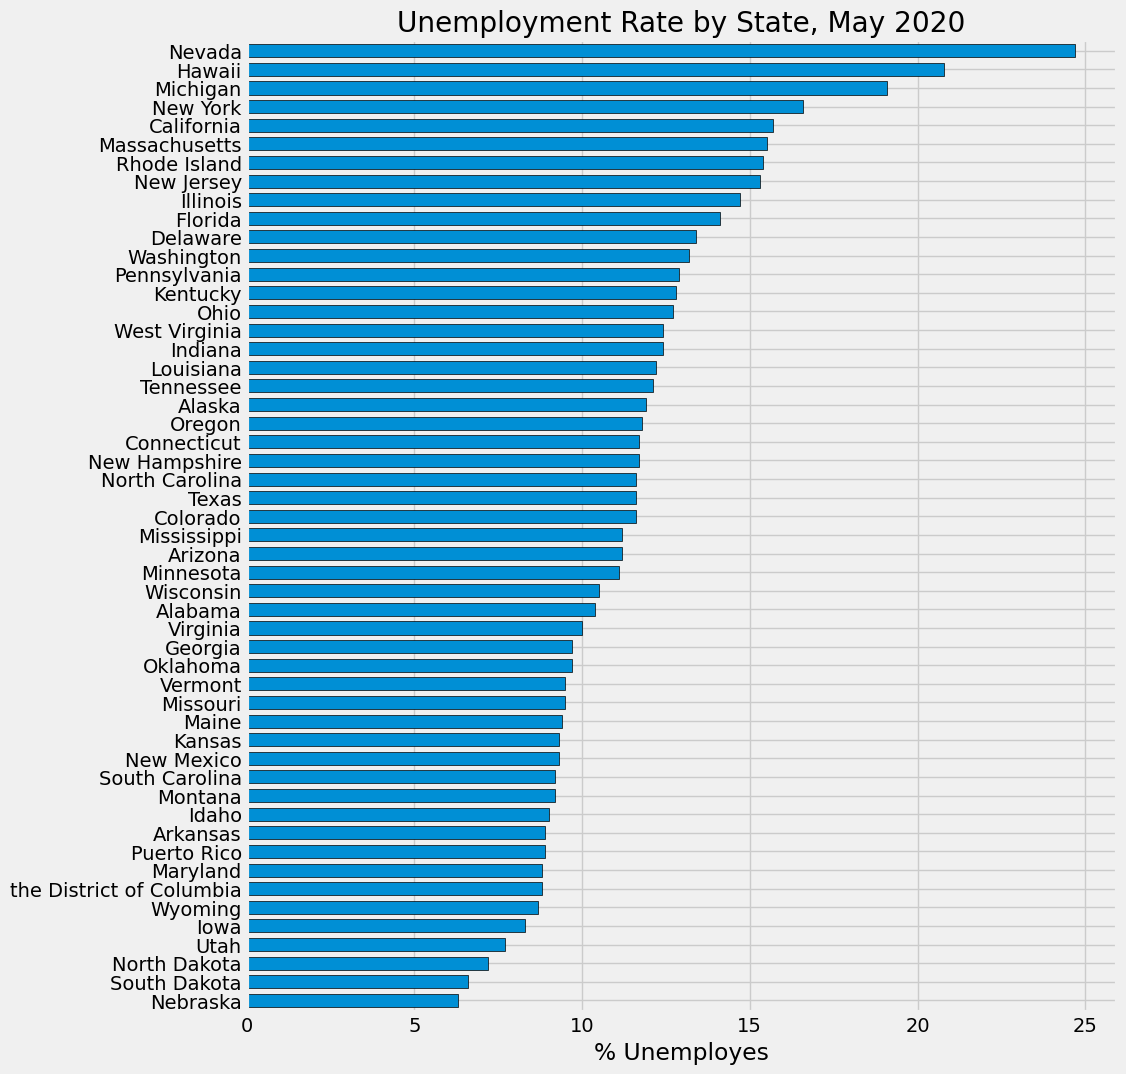

In [194]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize = (10, 12), width = 0.7, edgecolor = 'black', title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployes')
plt.show()

# 6. Pull Participation Rate

In [195]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [196]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked

part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# 7. Plot Unemployment vs Participation for each state

In [197]:
# Fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

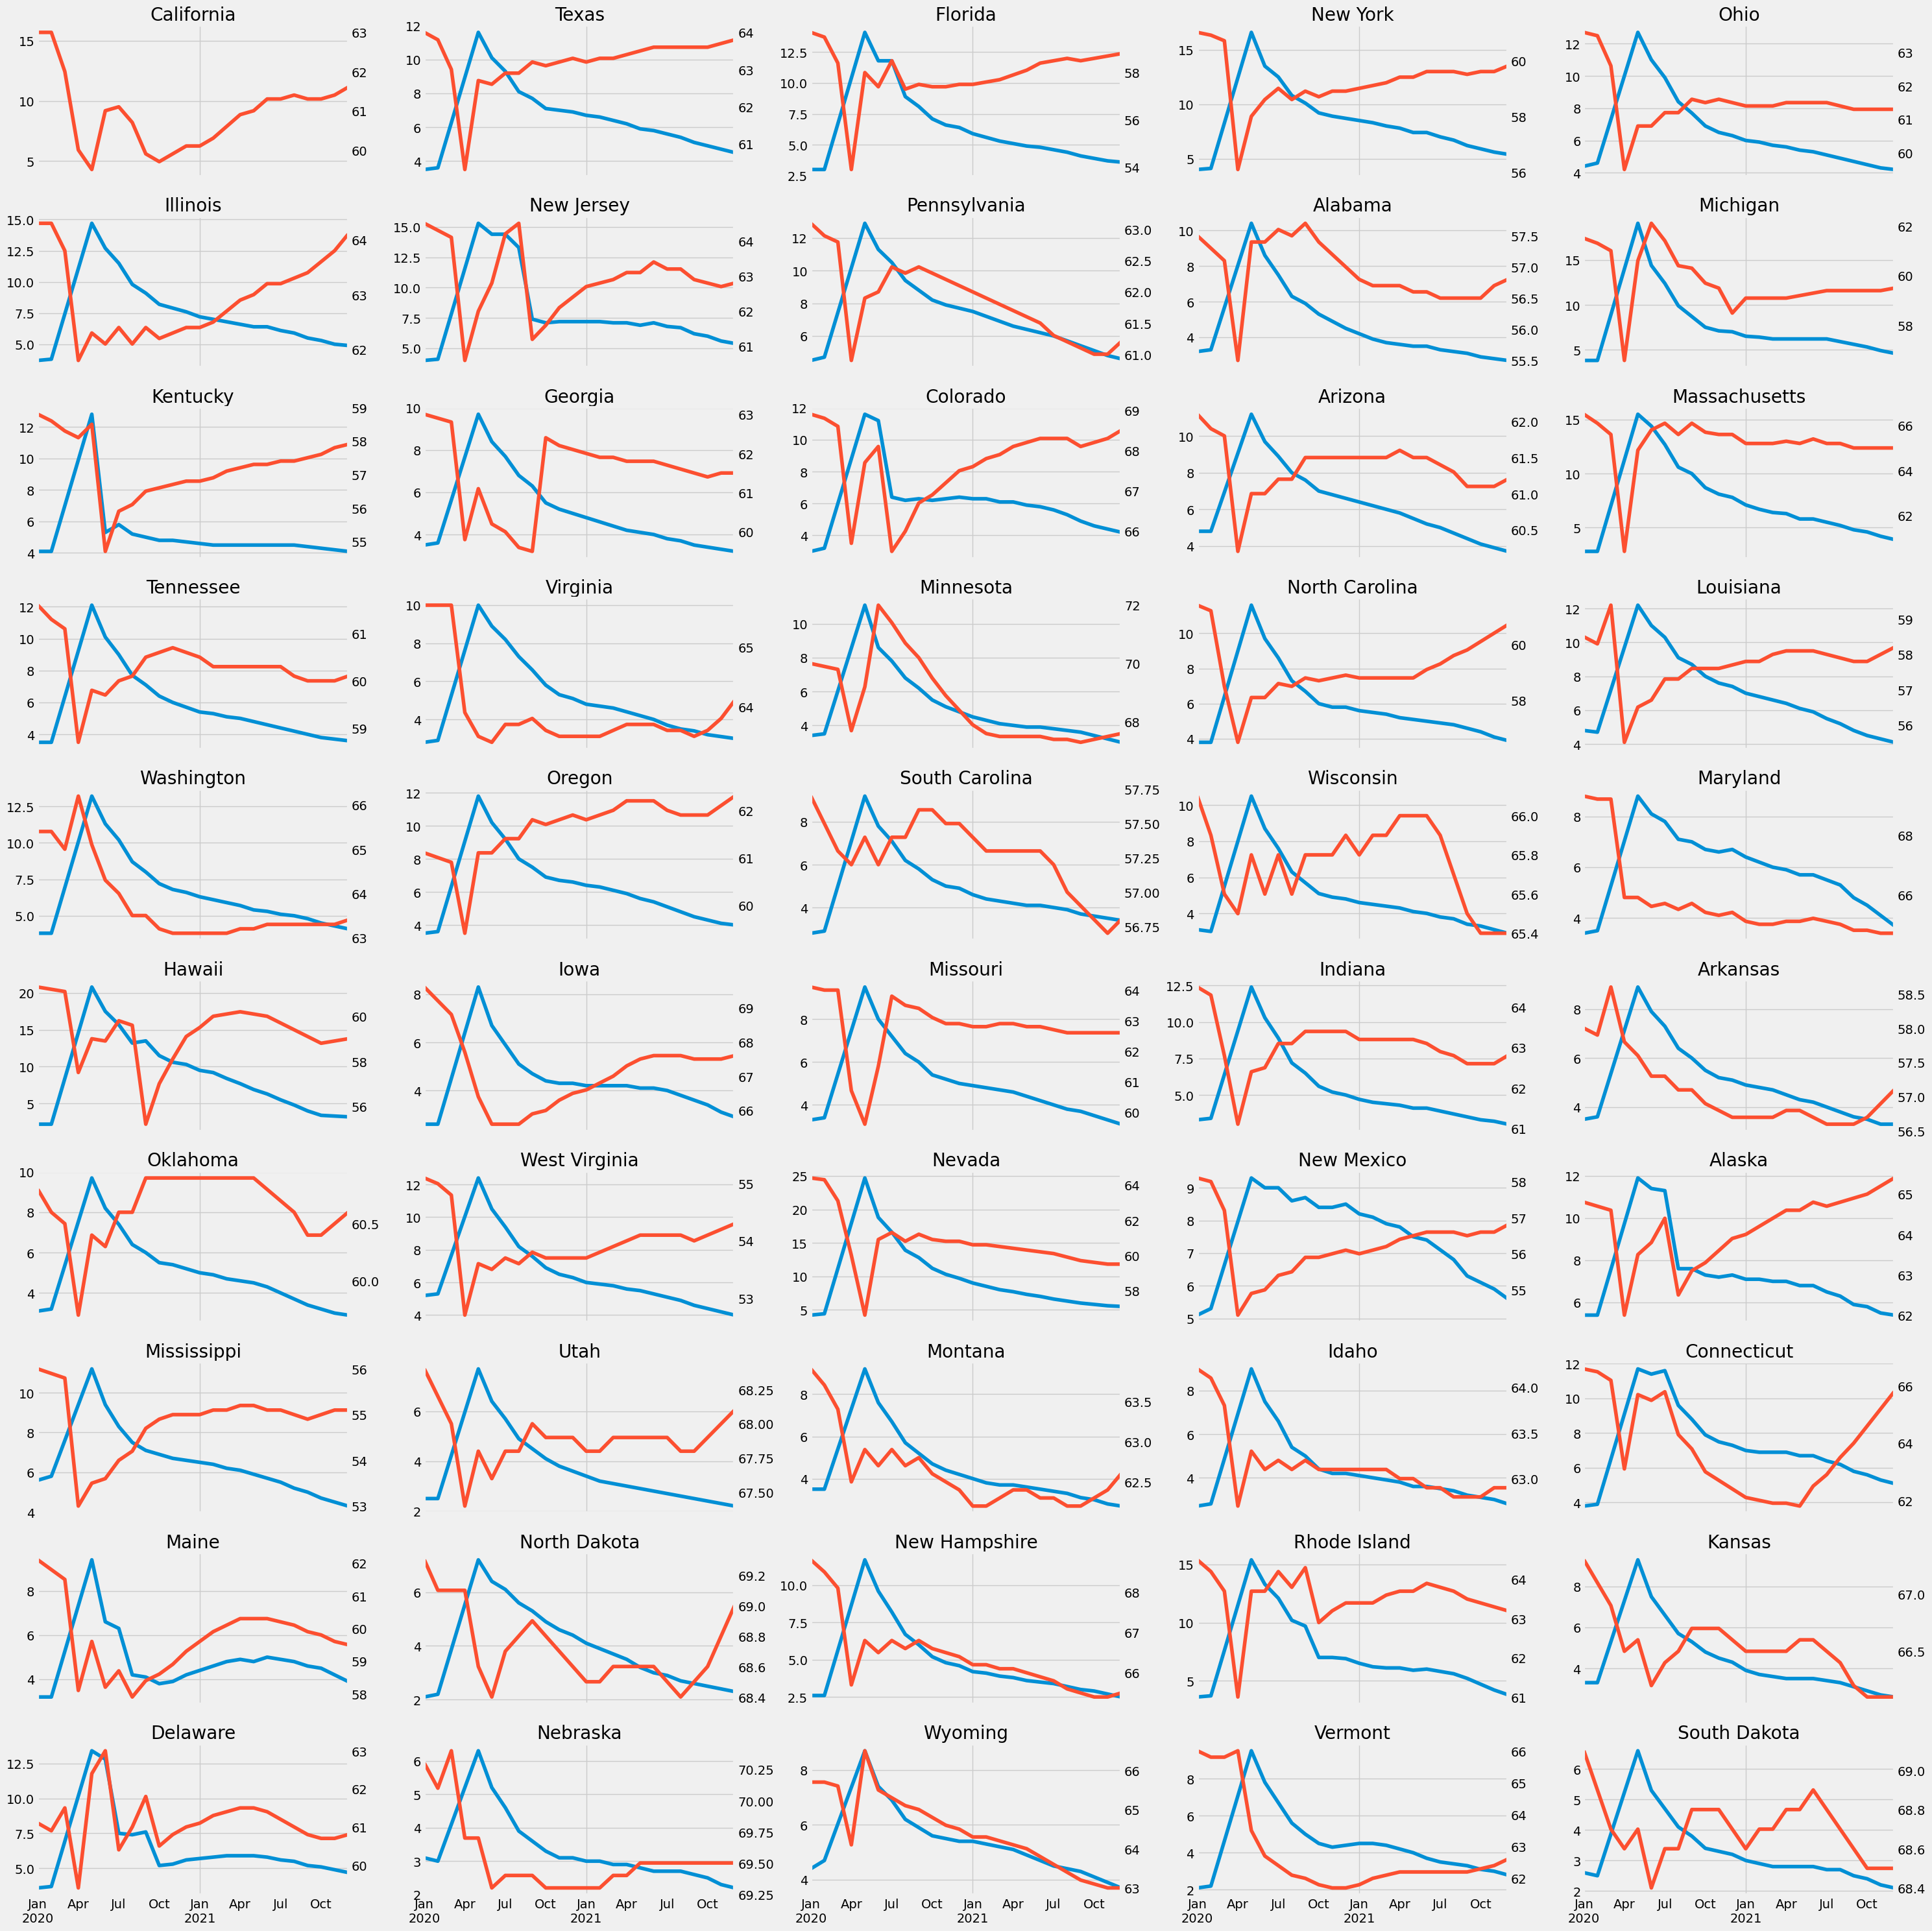

In [198]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

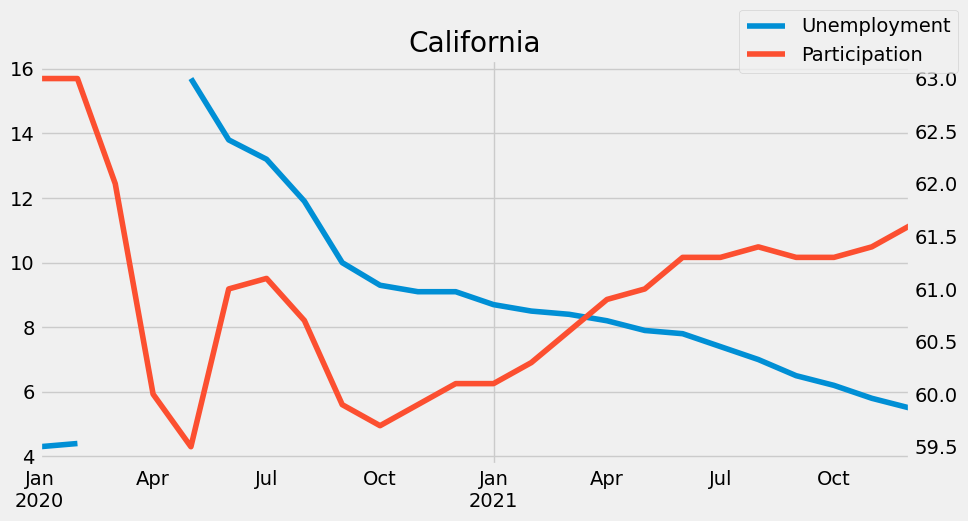

In [202]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment', 'Participation'])
plt.show()
